<a href="https://colab.research.google.com/github/Amoebaaa/LA2/blob/main/transform_tiefighter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 선언

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

INF = 1000  # 그림판 크기
LEN = 100   # 처음 사각형의 크기

### 축 그리기 및 사각형 그리기

In [2]:
def draw_axis(ax):
  ax.axhline(0, color='black', alpha=0.3)  # x-axis line
  ax.axvline(0, color='black', alpha=0.3)  # y-axis line
  ax.set_xlim(-INF, INF)
  ax.set_ylim(-INF, INF)
  ax.set_aspect('equal')  # 정사각형 모양으로 backboard 그리기

In [3]:
def draw_rectangle(ax, p1, p2, p3, p4):
  my_polygon = Polygon([p1, p2, p3, p4])
  ax.add_patch(my_polygon)

### 본론
#### 1. 변환 구현
* translate(p, dx, dy)
* rotate(p, theta)  
* scale(p, sx, sy)  
* shear_x(p, sx)  
* shear_y(p, sy)  
* reflect_x(p)  
* reflect_y(p)   
* ...

In [4]:
# 점 p를 x축 방향으로 dx만큼, y축 방향으로 dy만큼 이동시킨 점 q를 구할 것
# q = T(dx, dy) p1
def translate(p, dx, dy):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 이동 변환 행렬 생성
  m = np.array([[1.0,0.0, dx], [0.0, 1.0, dy], [0.0, 0.0, 1.0]])
  
  # 3. 행렬과 벡터의 곱
  q = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)
  #print(q)

  # 4. 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q

In [5]:
def scale(p,a,b):
  hp = np.array([p[0],p[1],1.0])
  m = np.array([[a,0.0,0.0],[0.0,b,0.0],[0.0,0.0,1.0]])

  q = np.dot(m,hp)

  q = np.array([q[0],q[1]])
  return q


In [6]:
def rotate(p,angle):
  hp = np.array([p[0], p[1], 1.0])

  m = np.array([[np.cos(angle),-np.sin(angle), 0.0], [np.sin(angle), np.cos(angle), 0.0], [0.0, 0.0, 1.0]])
  

  q = np.dot(m, hp)  
  q = np.array([q[0], q[1]])
  return q

In [7]:
def shear_x(p,a):
  hp = np.array([p[0], p[1], 1.0])
  m = np.array([[1.0,a, 0.0], [0, 1.0, 0.0], [0.0, 0.0, 1.0]])


  
  q = np.dot(m, hp)  
  q = np.array([q[0], q[1]])
  return q

In [8]:
def shear_y(p,a):
  hp = np.array([p[0], p[1], 1.0])


  m = np.array([[1,0, 0.0], [a, 1.0, 0.0], [0.0, 0.0, 1.0]])
  

  q = np.dot(m, hp) 

  q = np.array([q[0], q[1]])
  return q

In [9]:
def reflect_x(p):
  hp = np.array([p[0], p[1], 1.0])

  m = np.array([[1.0,0,0.0], [0, -1.0, 0.0], [0.0, 0.0, 1.0]])


  q = np.dot(m, hp)
  q = np.array([q[0], q[1]])
  return q

#### 2. 파트 그리기
* draw_cockpit(p1, p2, p3, p4)    # 중앙 조종석
* draw_left_arm(p1, p2, p3, p4)   # 왼쪽 날개축
* draw_left_wing(p1, p2, p3, p4)  # 왼쪽 날개
* draw_right_arm(p1, p2, p3, p4)  # 오른쪽 날개축
* draw_right_wing(p1, p2, p3, p4) # 오른쪽 날개

In [10]:
def draw_cockpit(ax, p1, p2, p3, p4):  # 중앙 조종석
  # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  
  # 2. 크기 변환: S(5, 5)
  s = 5
  q1 = scale(q1, s, s)
  q2 = scale(q2, s, s)
  q3 = scale(q3, s, s)
  q4 = scale(q4, s, s)
  
  # 3. 회전 변환: R(pi/4)
  q1 = rotate(q1, 3.14/4.0)
  q2 = rotate(q2, 3.14/4.0)
  q3 = rotate(q3, 3.14/4.0)
  q4 = rotate(q4, 3.14/4.0)
  
  # 4. polygon 그리기 
  draw_rectangle(ax, q1, q2, q3, q4)

In [11]:
def draw_right_arm(ax, p1, p2, p3, p4): 

  #중앙에 위치
  q1 = translate(p1,-LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)


  s1 = 6
  s2 =0.6
  q1 = scale(q1, s1, s2)
  q2 = scale(q2, s1, s2)
  q3 = scale(q3, s1, s2)
  q4 = scale(q4, s1, s2)

  shear = 0.1
  q1 = shear_y(q1,shear)  
  q2 = shear_y(q2,shear)
  q3 = shear_y(q3,shear)
  q4 = shear_y(q4,shear)

  #위치 조정
  q1 = translate(q1,LEN*5, -LEN/2)
  q2 = translate(q2,LEN*5, -LEN/2)
  q3 = translate(q3,LEN*5, -LEN/2)
  q4 = translate(q4,LEN*5, -LEN/2)
  
  #polygon 그리기 
  draw_rectangle(ax, q1, q2, q3, q4)

  q1=reflect_x(q1)
  q2=reflect_x(q2)
  q3=reflect_x(q3)
  q4=reflect_x(q4)

  draw_rectangle(ax,q1,q2,q3,q4)

In [12]:
def draw_right_wing(ax,p1,p2,p3,p4):
  #중앙에 위치
  q1 = translate(p1,-LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  s1 = 1
  s2 = 7
  q1 = scale(q1, s1, s2)
  q2 = scale(q2, s1, s2)
  q3 = scale(q3, s1, s2)
  q4 = scale(q4, s1, s2)

  shear = 1.5
  q1 = shear_y(q1,shear)  
  q2 = shear_y(q2,shear)
  q3 = shear_y(q3,shear)
  q4 = shear_y(q4,shear)

  q1 = translate(q1,LEN*8, LEN*2)
  q2 = translate(q2, LEN*8, LEN*2)
  q3 = translate(q3, LEN*8, LEN*2)
  q4 = translate(q4, LEN*8, LEN*2)

  draw_rectangle(ax,q1,q2,q3,q4)

  q1=reflect_x(q1)
  q2=reflect_x(q2)
  q3=reflect_x(q3)
  q4=reflect_x(q4)

  draw_rectangle(ax,q1,q2,q3,q4)

In [13]:
def draw_left_wing(ax,p1,p2,p3,p4):
  #중앙에 위치
  q1 = translate(p1,-LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  s1 = 1
  s2 = 7
  q1 = scale(q1, s1, s2)
  q2 = scale(q2, s1, s2)
  q3 = scale(q3, s1, s2)
  q4 = scale(q4, s1, s2)

  shear = 1.5
  q1 = shear_y(q1,shear)  
  q2 = shear_y(q2,shear)
  q3 = shear_y(q3,shear)
  q4 = shear_y(q4,shear)

  q1 = translate(q1,-LEN*8, -LEN*2)
  q2 = translate(q2, -LEN*8, -LEN*2)
  q3 = translate(q3, -LEN*8, -LEN*2)
  q4 = translate(q4, -LEN*8, -LEN*2)

  draw_rectangle(ax,q1,q2,q3,q4)

  q1=reflect_x(q1)
  q2=reflect_x(q2)
  q3=reflect_x(q3)
  q4=reflect_x(q4)

  draw_rectangle(ax,q1,q2,q3,q4)

In [14]:
def draw_left_arm(ax, p1, p2, p3, p4): 

  #중앙에 위치
  q1 = translate(p1,-LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)


  s1 = 6
  s2 =0.6
  q1 = scale(q1, s1, s2)
  q2 = scale(q2, s1, s2)
  q3 = scale(q3, s1, s2)
  q4 = scale(q4, s1, s2)

  shear = 0.1
  q1 = shear_y(q1,shear)  
  q2 = shear_y(q2,shear)
  q3 = shear_y(q3,shear)
  q4 = shear_y(q4,shear)

  #위치 조정
  q1 = translate(q1,-LEN*5, LEN/2)
  q2 = translate(q2,-LEN*5, LEN/2)
  q3 = translate(q3,-LEN*5, LEN/2)
  q4 = translate(q4,-LEN*5, LEN/2)
  
  #polygon 그리기 
  draw_rectangle(ax, q1, q2, q3, q4)

  q1=reflect_x(q1)
  q2=reflect_x(q2)
  q3=reflect_x(q3)
  q4=reflect_x(q4)

  draw_rectangle(ax,q1,q2,q3,q4)

In [15]:
# 2. tiefigher 그리기
def draw_object(ax):
  p1 = np.array([0, 0])
  p2 = np.array([LEN, 0])
  p3 = np.array([LEN, LEN])
  p4 = np.array([0, LEN])

  # 1. 중앙 조종석 그리기
  draw_cockpit(ax, p1, p2, p3, p4)

  
  draw_left_arm(ax,p1,p2,p3,p4)
  draw_left_wing(ax,p1,p2,p3,p4)

  draw_right_arm(ax,p1,p2,p3,p4)
  draw_right_wing(ax,p1,p2,p3,p4)


### 3. main

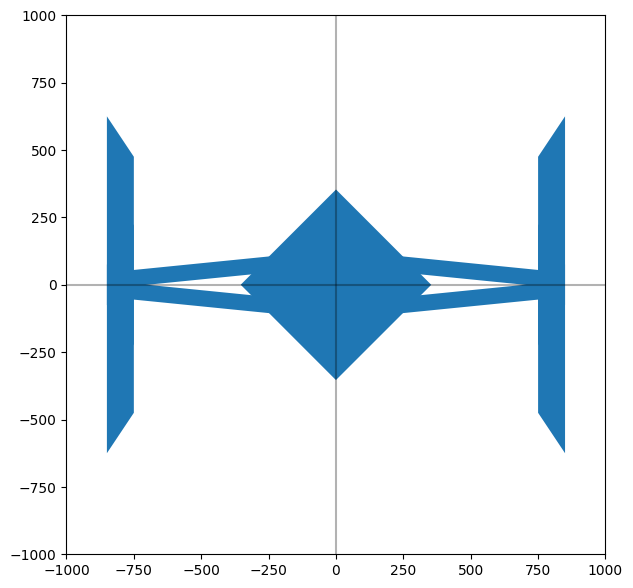

In [16]:
# 그림판 선언 및 크기 설정
fig, ax = plt.subplots(figsize=(7,7))

# 축 그리기
draw_axis(ax)

# 물체 그리기
draw_object(ax)

plt.show()